<a href="https://colab.research.google.com/github/rizkaaa19/MachineLearning/blob/main/Regression_data_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Path to the CSV file in Google Drive
file_path = "/content/gdrive/MyDrive/machne learning/Salary_dataset.csv"

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [ ]:
df.head(15)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

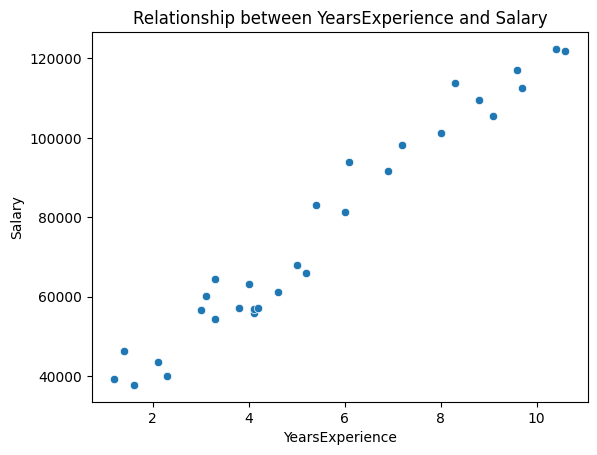

In [ ]:
sns.scatterplot(data=df, x="YearsExperience", y="Salary")

# Menambahkan label dan judul
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Relationship between YearsExperience and Salary')

#Menampilkan plot
plt.show()

In [ ]:
# Kolom label (variable dependen)
x = df["YearsExperience"]

# Kolom target (variable independen)
y = df["Salary"]

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

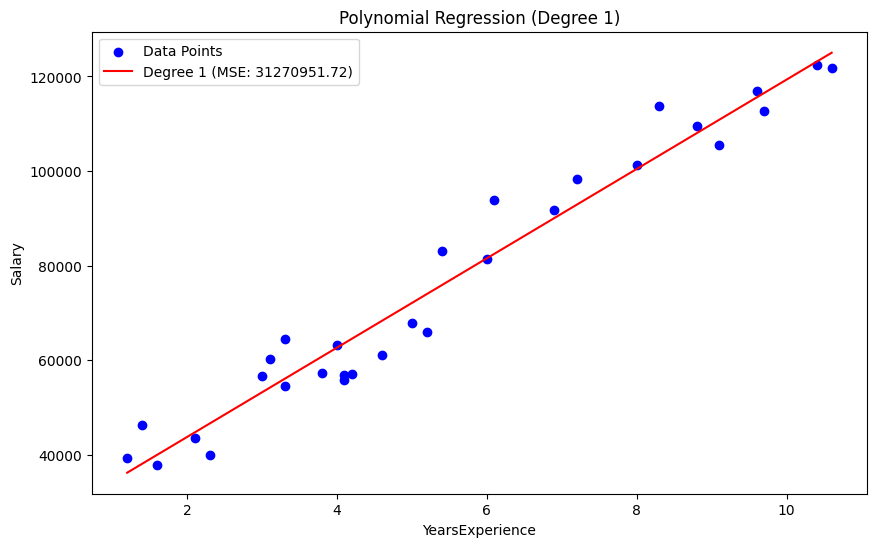

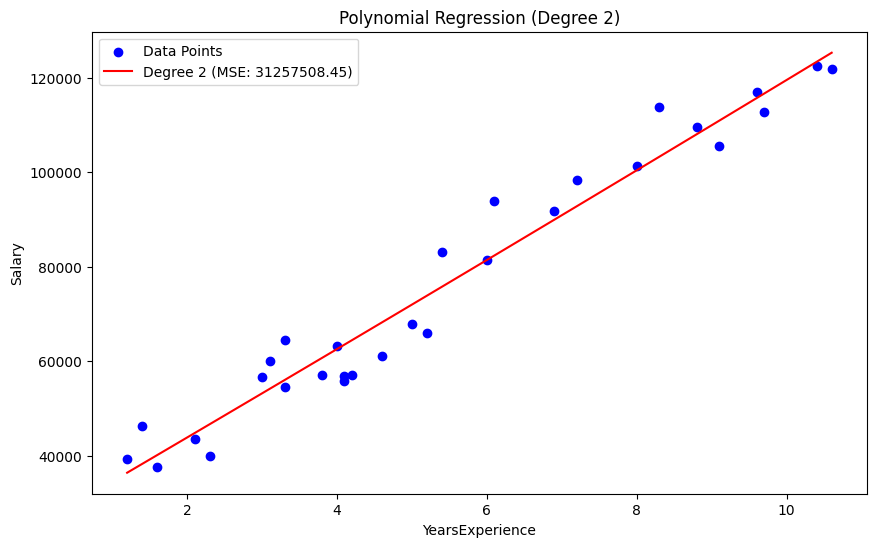

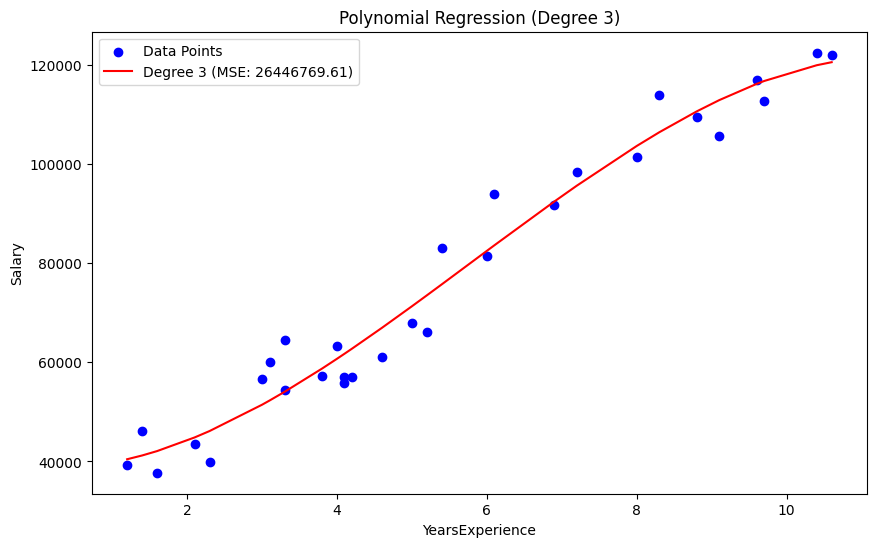

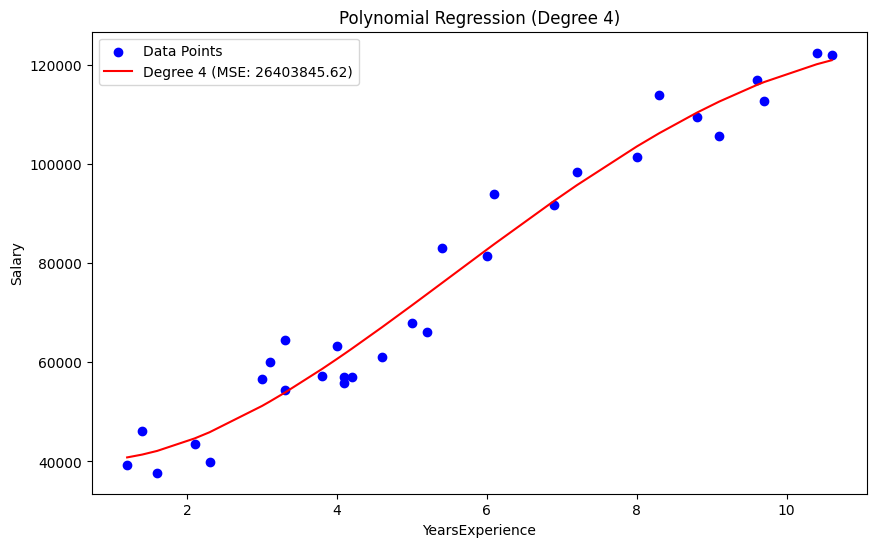

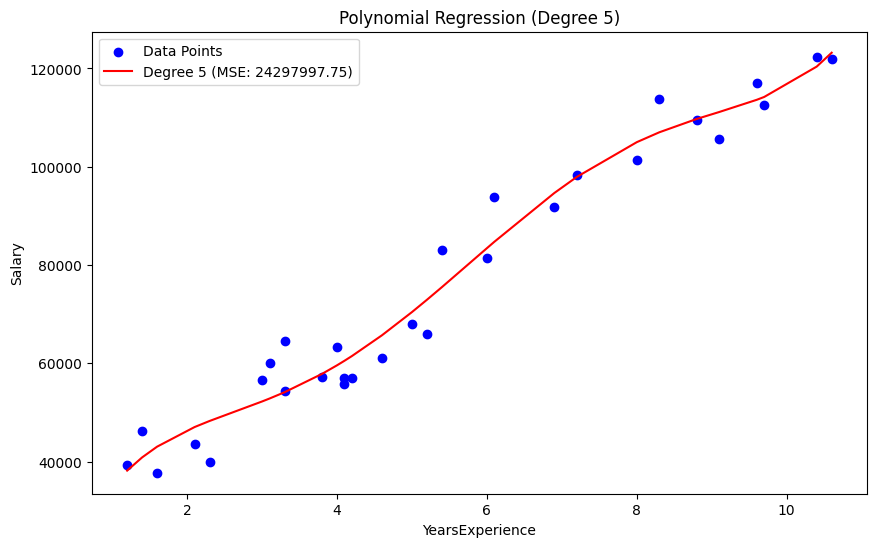

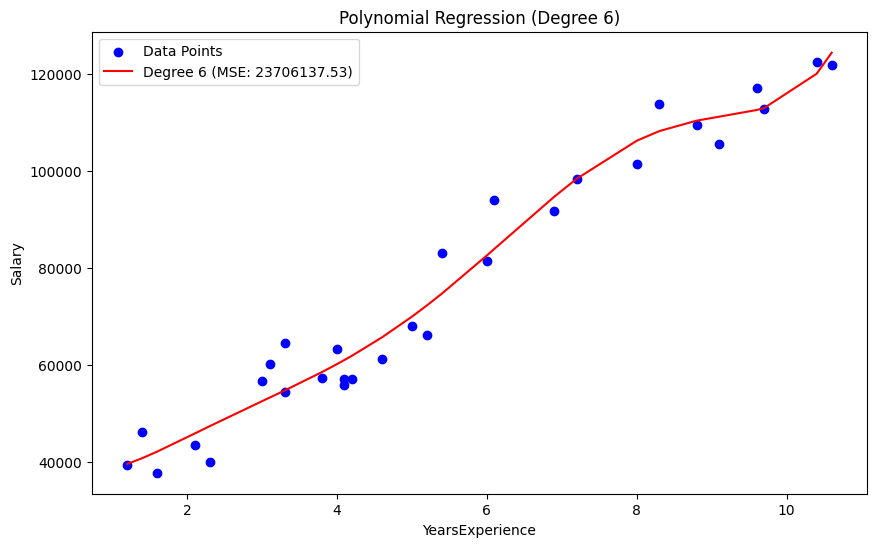

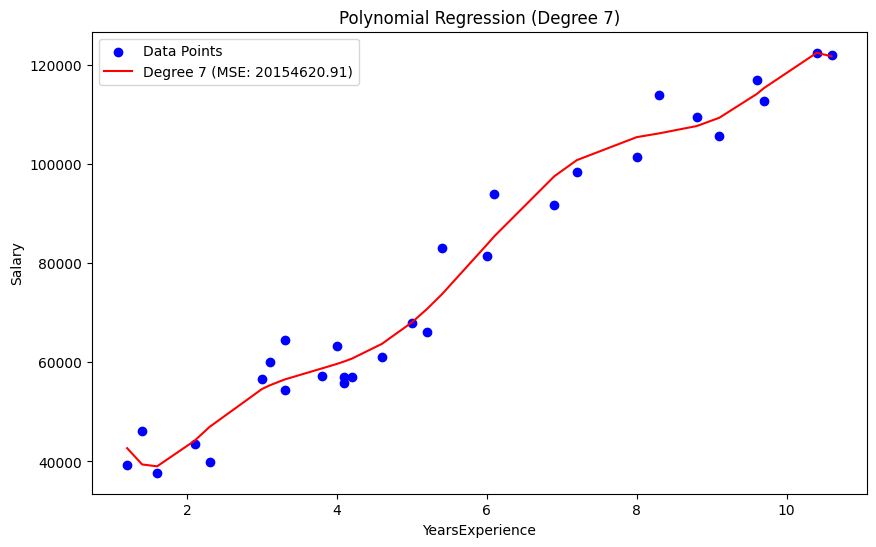

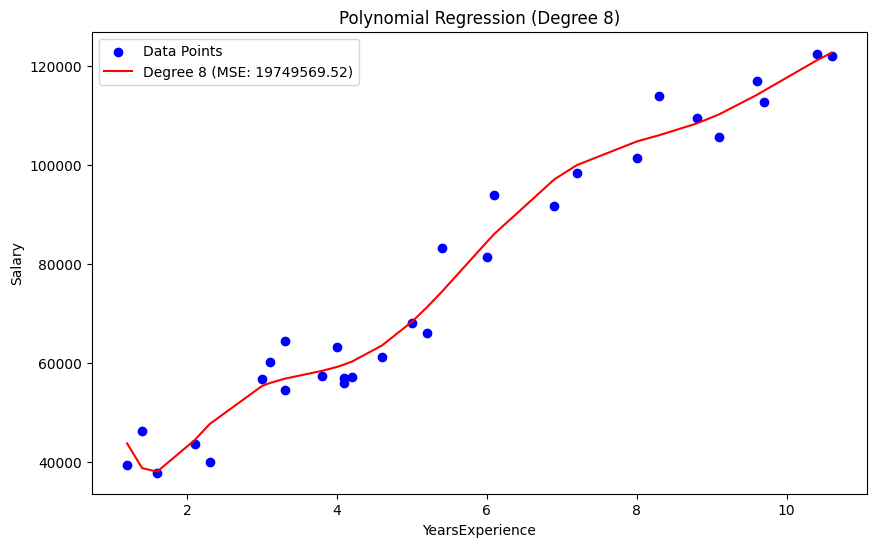

Mean Squared Error (MSE) for each degree:
Degree 1: 31270951.72
Degree 2: 31257508.45
Degree 3: 26446769.61
Degree 4: 26403845.62
Degree 5: 24297997.75
Degree 6: 23706137.53
Degree 7: 20154620.91
Degree 8: 19749569.52


In [ ]:
# Data
x = df['YearsExperience'].values.reshape(-1, 1)  # Variabel x: Number of Units
y = df['Salary'].values  # Variabel y: Manufacturing Cost

# Menghitung MSE untuk setiap derajat polynomial
mse_values = []

for degree in range(1, 9):
    # Mengubah fitur menjadi polinomial
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    # Membuat model regresi polinomial
    model = LinearRegression()
    model.fit(x_poly, y)

    # Menghitung prediksi
    y_pred = model.predict(x_poly)

    # Menghitung Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot hasil regresi
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, y_pred, color='red', label=f'Degree {degree} (MSE: {mse:.2f})')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Menampilkan MSE untuk setiap derajat polynomial
print('Mean Squared Error (MSE) for each degree:')
for degree, mse in enumerate(mse_values, start=1):
    print(f'Degree {degree}: {mse:.2f}')